In [ ]:
!pip install opencv-python==4.4.0.40

     |████████████████████████████████| 49.4 MB 60 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

#Verificando a versão do open cv
print(cv2.__version__)

#Conectando ao google drive do usuário do colab
from google.colab import drive
drive.mount('/content/gdrive/')

4.4.0
Mounted at /content/gdrive/


CARREGANDO O YOLO

In [ ]:
path = '/content/gdrive/MyDrive/YoloRecursos/modeloYoloV4.zip'
zipObject = zipfile.ZipFile(file=path,mode='r')

zipObject.extractall('./')
zipObject.close()

In [ ]:
labelsPath = os.path.sep.join(['/content/cfg', 'coco.names'])
labelsPath

'/content/cfg/coco.names'

In [ ]:
LABELS = open(labelsPath).read().strip().split('\n')
LABELS

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
weightsPath = os.path.sep.join(['/content', 'yolov4.weights'])
configPath = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])


In [ ]:
#Criando a rede neural
net = cv2.dnn.readNet(configPath, weightsPath)
net

<dnn_Net 0x7f2fa386a4f0>

In [ ]:
#Definindo mais configurações para a detecção
#Criando uma cor para cada classe do COCO definido em LABELS
np.random.seed(42)
COLORS = np.random.randint(0,255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[102 220 225]
 [ 95 179  61]
 [234 203  92]
 [  3  98 243]
 [ 14 149 245]
 [ 46 106 244]
 [ 99 187  71]
 [212 153 199]
 [188 174  65]
 [153  20  44]
 [203 152 102]
 [214 240  39]
 [121  24  34]
 [114 210  65]
 [239  39 214]
 [244 151  25]
 [ 74 145 222]
 [ 14 202  85]
 [145 117  87]
 [184 189 221]
 [116 237 109]
 [ 85  99 172]
 [226 153 103]
 [235 146  36]
 [151  62  68]
 [181 130 160]
 [160 166 149]
 [  6  69   5]
 [ 52 253 112]
 [ 14   1   3]
 [ 76 248  87]
 [233 212 184]
 [235 245  26]
 [213 157 253]
 [ 68 240  37]
 [219  91  54]
 [129   9  51]
 [  0 191  20]
 [140  46 187]
 [147   1 254]
 [ 20 153 243]
 [ 46 160  68]
 [ 19 158 203]
 [209 226  77]
 [ 57  77 149]
 [156  21 112]
 [ 86 134 252]
 [ 24 207   1]
 [235 242 147]
 [110  88 107]
 [231   5  48]
 [254 141  74]
 [218 161  87]
 [134  58 100]
 [162 156 254]
 [ 73  93 102]
 [169 222 181]
 [ 35  71 242]
 [ 11 219 253]
 [201  74 187]
 [ 10  72 249]
 [207 227 201]
 [ 93  14 231]
 [150  59 189]
 [  0 193 116]
 [189 251  49]
 [ 23 174 

In [ ]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('TOTAL DE CAMADAS DO MODELO: '+ str(len(ln)))

Todas as camadas
['conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [ ]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[[327]
 [353]
 [379]]


In [ ]:
#Lista de camadas de saída
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(ln)

['yolo_139', 'yolo_150', 'yolo_161']


CARREGAMENTO DA IMAGEM

In [ ]:
def mostrar(imagem):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
  plt.show()

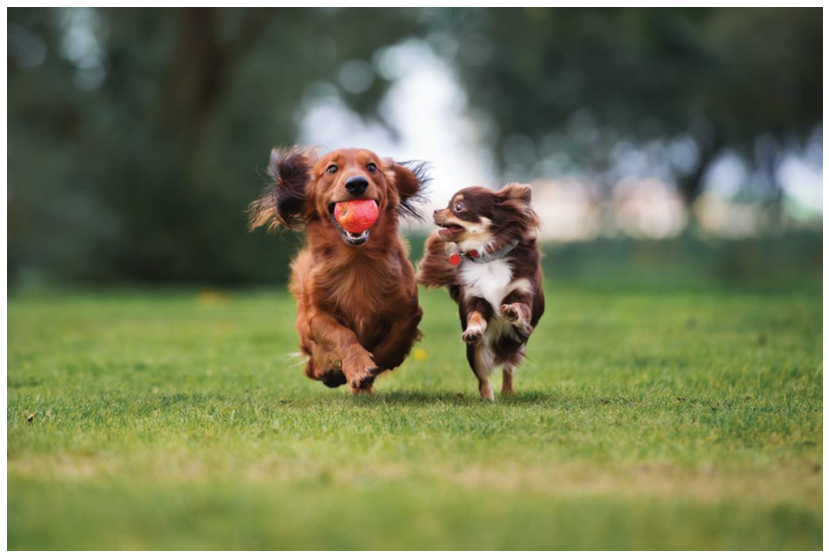

In [51]:
imagem = cv2.imread('/content/gdrive/MyDrive/YoloRecursos/imagens/cachorros02.jpg')
mostrar(imagem)

In [52]:
imagemCP = imagem.copy()


In [53]:
#Pegando a altura e largura da imagem
(H, W) = imagemCP.shape[:2]
print('Altura: '+str(H)+', Largura: '+str(W))

Altura: 1000, Largura: 1500


PRE-PROCESSAMENTO DA IMAGEM

In [54]:
inicio = time.time()

#Imagem precisa ficar no formato de blob para a rede neural
#redimensionamento da imagem e normalização 
blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416,416), swapRB=True, crop=False )
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('Yolo Levou {:.2f} segundos'.format(termino-inicio))


Yolo Levou 2.18 segundos


REALIZANDO A PREDIÇÃO

In [55]:
threshold = 0.5
#NMS - Non-Max Supression. 0.3 equivale a 30%
threshold_NMS = 0.3
bounding_boxes = []
confiances = []
idClasses = []



In [56]:
#Observando o resultado das camadas de saída
#layer_outputs[0]
#layer_outputs[1]
layer_outputs[2]

#Do resultado do array -
#valores são: bx, by, bh, bw, pc (probabilidade de ter um obj), c (classe classificada)

array([[0.06604478, 0.0685785 , 0.23560491, ..., 0.        , 0.        ,
        0.        ],
       [0.05934988, 0.06845262, 0.3595619 , ..., 0.        , 0.        ,
        0.        ],
       [0.03728741, 0.056093  , 0.7128142 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.93470675, 0.931289  , 0.18813148, ..., 0.        , 0.        ,
        0.        ],
       [0.9385062 , 0.93424785, 0.26260322, ..., 0.        , 0.        ,
        0.        ],
       [0.9557555 , 0.9567792 , 0.5684606 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [57]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confiance = scores[classeID]

    if confiance > threshold:
        print('scores: '+ str(scores))
        print('classe mais provável: '+ str(classeID))
        print('confiança: '+ str(confiance))

        #Coordenadas da caixa
        caixa = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = caixa.astype('int')

        x = int(centerX - (width / 2 ))
        y = int(centerY - (height / 2 ))

        bounding_boxes.append([x, y, int(width), int(height)])
        confiances.append(float(confiance))
        idClasses.append(classeID)
        

scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9754098 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
classe mais provável: 16
confiança: 0.9754098
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9813949 0.        0.        0.        0.
 0.       

In [49]:
!python3 cocodatasetDownload.py

OPÇÕES
1 - Download de 150 imagens para treino de cada classe
2 - Download de 10 imagens para validação
0 - PARA SAIR

Entre com a opção: 2
loading annotations into memory...
Done (t=0.60s)
creating index...
index created!
Successfully created the directory valid/ 
Successfully created the directory bird 
Creation of the directory valid/ failed
Successfully created the directory cat 
Creation of the directory valid/ failed
Successfully created the directory dog 
Creation of the directory valid/ failed
Successfully created the directory horse 
Creation of the directory valid/ failed
Successfully created the directory sheep 
Creation of the directory valid/ failed
Successfully created the directory cow 
Creation of the directory valid/ failed
Successfully created the directory elephant 
Creation of the directory valid/ failed
Successfully created the directory bear 
Creation of the directory valid/ failed
Successfully created the directory zebra 
Creation of the directory valid/ failed
S

In [ ]:
print(bounding_boxes)
print(confiances)
print(idClasses)

[[834, 1, 154, 356], [834, 1, 154, 355], [833, 2, 155, 353], [833, 7, 155, 354], [833, 7, 155, 354], [833, 9, 155, 349], [957, 538, 303, 151], [955, 538, 307, 151], [953, 537, 311, 153], [832, -5, 155, 366], [838, 11, 146, 350], [948, 534, 320, 153]]
[0.7407426238059998, 0.7351008057594299, 0.7330856919288635, 0.5075628757476807, 0.5141648650169373, 0.5175462961196899, 0.9754794239997864, 0.9736371040344238, 0.9706279039382935, 0.8463960289955139, 0.6638685464859009, 0.976809561252594]
[39, 39, 39, 39, 39, 39, 76, 76, 76, 39, 39, 76]


Aplicando o Non-Max Supression

In [ ]:
#Pegando os maiores valores, após a NMS
#A quantidade de valores no array, indica a quantidade de objetos detectados
objs = cv2.dnn.NMSBoxes(bounding_boxes, confiances, threshold, threshold_NMS)
objs

array([[11],
       [ 9]], dtype=int32)

In [ ]:
print(confiances[7], confiances[15] ,confiances[11])

IndexError: ignored

Apresentando o resultado

In [ ]:
#Mostrar cada objeto individualmente
if len(objs) > 0:
  #flatten é uma função que passa de uma matriz, para um vetor simples
  for item in objs.flatten():
    (x, y) = (bounding_boxes[item][0], bounding_boxes[item][1]) 
    (w, h) = (bounding_boxes[item][2], bounding_boxes[item][3])

    objeto = imagemCP[y:y + h, x:x + w]
    #cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[ idClasses[item] ] ]

    cv2.rectangle(imagem, (x, y), (x+w,y+h), cor, 2 )
    texto = "{}: {:.4f}".format(LABELS[idClasses[item]], confiances[item])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2 )


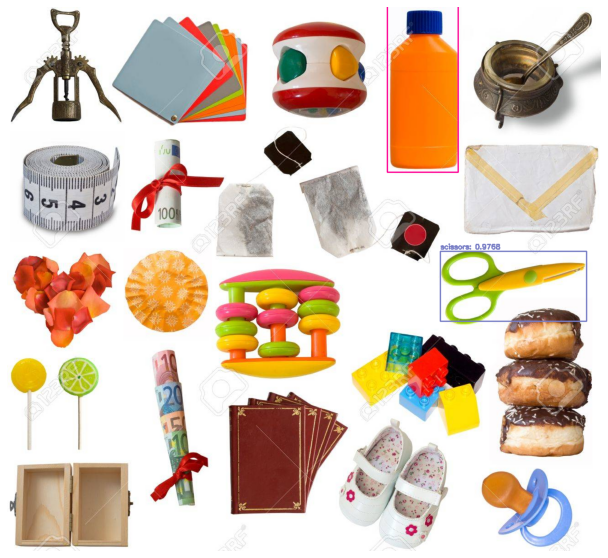

In [ ]:
mostrar(imagem)

In [ ]:
cv2.imwrite('resultado.jpg', imagem)

True

In [ ]:
#copiando pro drive o resultado
!cp ./resultado.jpg /content/gdrive/MyDrive/YoloRecursos/imagens/resultadoCachorro.jpg

EXPLORANDO MAIS OPÇÕES DO OPENCV

In [ ]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

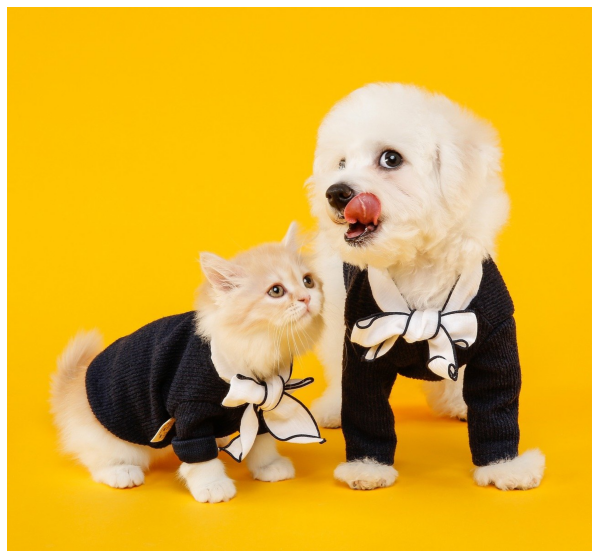

Altura: 1191, Largura: 1280


In [ ]:
imagem = cv2.imread('/content/gdrive/MyDrive/YoloRecursos/imagens/cachorro_gato.jpg')
mostrar(imagem)
imagemCP = imagem.copy()
(H, W) = imagem.shape[:2]
print('Altura: '+str(H)+', Largura: '+str(W))


In [ ]:
#Redimencionamento

def redimensionar(imagem, larguraMaxima=600):
  if imagem.shape[1] > larguraMaxima:
    #mantendo a proporção
    proporcao = imagem.shape[1] / imagem.shape[0]
    novaLargura = larguraMaxima 
    novaAltura = int(novaLargura/ proporcao)
  else:
    novaLargura = imagem.shape[1] 
    novaAltura = imagem.shape[0] 


  imagem = cv2.resize(imagem, (novaLargura, novaAltura))
  return imagem



In [ ]:
imagem = redimensionar(imagem)

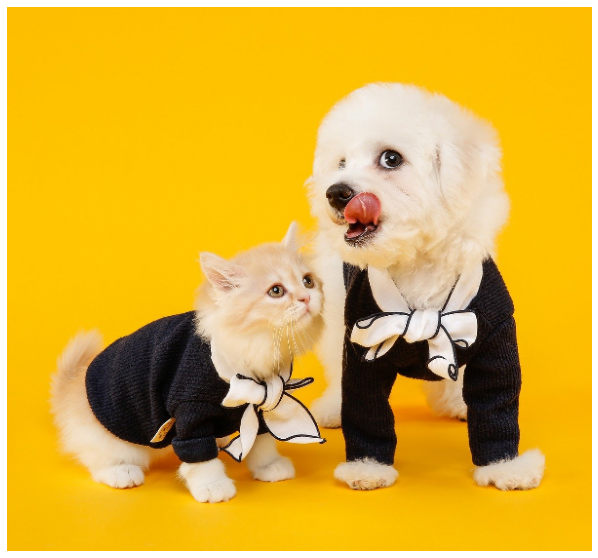

Altura: 558, Largura: 600


In [ ]:
mostrar(imagem)
imagemCP = imagem.copy()
(H, W) = imagem.shape[:2]
print('Altura: '+str(H)+', Largura: '+str(W))

In [ ]:
def blobImagem(net, imagem, mostrarTexto = True):
  inicio = time.time()

  blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416,416), swapRB=True, crop=False )
  net.setInput(blob)
  layer_outputs = net.forward(ln)

  fim = time.time()

  if mostrarTexto:
    print('YOLO levou {:.2f} segundos'.format( fim - inicio))
  
  return net, imagem, layer_outputs

In [ ]:
net, imagem, layer_outputs = blobImagem(net, imagem)

YOLO levou 1.67 segundos


In [ ]:
_threshold = 0.5
#NMS - Non-Max Supression. 0.3 equivale a 30%
_threshold_NMS = 0.3
bounding_boxes = []
confiances = []
idClasses = []

In [ ]:
def deteccoes(detection, threshold, bounding_boxes, confiances, idClasses):
    scores = detection[5:]
    classeID = np.argmax(scores)
    confiance = scores[classeID]

    if confiance > threshold:
        #print('scores: '+ str(scores))
        #print('classe mais provável: '+ str(classeID))
        #print('confiança: '+ str(confiance))

        #Coordenadas da caixa
        caixa = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = caixa.astype('int')

        x = int(centerX - (width / 2 ))
        y = int(centerY - (height / 2 ))

        bounding_boxes.append([x, y, int(width), int(height)])
        confiances.append(float(confiance))
        idClasses.append(classeID)
    return bounding_boxes, confiances, idClasses



In [ ]:
for output in layer_outputs:
  for detection in output:
    bounding_boxes, confiances, idClasses = deteccoes(detection, _threshold, bounding_boxes, confiances,idClasses )

In [ ]:
print(bounding_boxes)
print(confiances)
print(idClasses)

[[353, 292, 132, 82], [34, 218, 319, 287], [31, 227, 323, 288], [282, 90, 257, 398], [276, 89, 267, 400], [278, 86, 263, 407], [303, 84, 244, 409], [301, 85, 246, 405], [302, 85, 243, 407], [33, 221, 300, 283], [43, 221, 296, 283], [42, 221, 297, 283], [45, 221, 291, 285]]
[0.5074111223220825, 0.7680822610855103, 0.7635812163352966, 0.8370375633239746, 0.8779317140579224, 0.8759221434593201, 0.9522935152053833, 0.9515087008476257, 0.9466642141342163, 0.5057767629623413, 0.6478962898254395, 0.6408296227455139, 0.6525734066963196]
[27, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


In [ ]:
objs = cv2.dnn.NMSBoxes(bounding_boxes, confiances, threshold, threshold_NMS)
objs

array([[6],
       [1],
       [0]], dtype=int32)

In [ ]:
def check_negativo(n):
  if n < 0:
    return 0
  else:
    return n

def funcoesImagem(imagem, i, confiances, bounding_boxes, COLORS, LABELS, mostrarTexto=True):
  (x, y) = (bounding_boxes[i][0], bounding_boxes[i][1]) 
  (w, h) = (bounding_boxes[i][2], bounding_boxes[i][3])

  #objeto = imagemCP[y:y + h, x:x + w]
  #cv2_imshow(objeto)

  cor = [int(c) for c in COLORS[ idClasses[i] ] ]
  
  fundo = np.full((imagem.shape), (0,0,0), dtype=np.uint8 )
  texto = "{}: {:.4f}".format(LABELS[idClasses[i]], confiances[i])
  
  cv2.putText(fundo, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2 )

  fx, fy, fw, fh = cv2.boundingRect(fundo[:,:,2])

  cv2.rectangle(imagem, (x, y), (x+w,y+h), cor, 2 )

  cv2.rectangle(imagem, (fx, fy), (fx+fw, fy+fh), cor, -1)
  cv2.rectangle(imagem, (fx, fy), (fx+fw, fy+fh), cor, 3)
  cv2.rectangle(imagem, (fx, fy), (fx+fw, fy+fh), cor, -1)

  cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)
  if mostrarTexto:
    print('> '+texto)
    print(x, y, w, h)

  

  return imagem,x,y,w,h

> dog: 0.9523
303 84 244 409


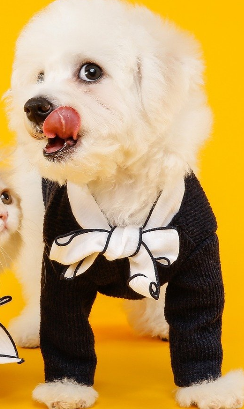

> dog: 0.7681
34 218 319 287


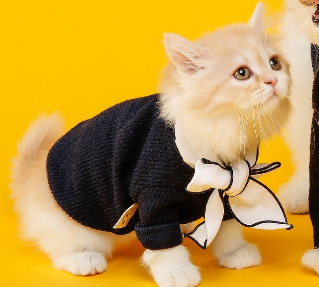

> tie: 0.5074
353 292 132 82


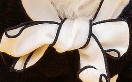

In [ ]:
if len(objs) > 0:
  for item in objs.flatten():
    imagem, x, y, w, h = funcoesImagem(imagem, item, confiances, bounding_boxes, COLORS, LABELS)
    objeto = imagemCP[y:y + h, x:x + w]
    cv2_imshow(objeto)

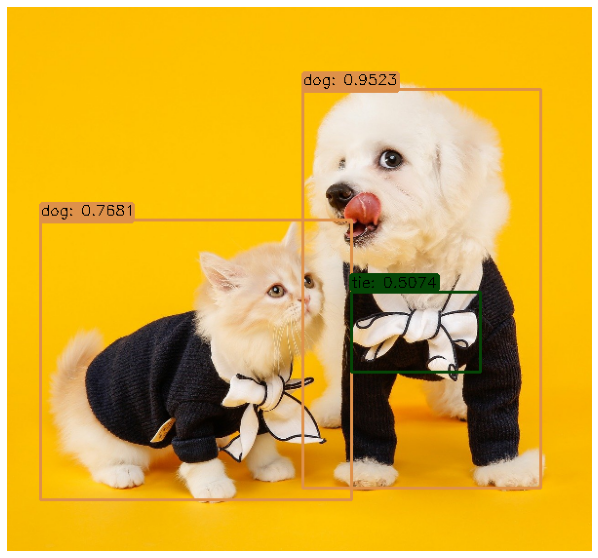

In [ ]:
mostrar(imagem)

DETECTANDO PARA VÁRIAS IMAGENS AO MESMO TEMPO

In [ ]:
path = '/content/gdrive/MyDrive/YoloRecursos/imagens/fotos_teste.zip'
zipObject = zipfile.ZipFile(file=path, mode = 'r')
zipObject.extractall('./')
zipObject.close()

In [ ]:
diretorioFotos = 'fotos_teste'
caminhos = [os.path.join(diretorioFotos, f) for f in os.listdir(diretorioFotos)]
print(caminhos)



['fotos_teste/gato03.jpg', 'fotos_teste/gato02.jpg', 'fotos_teste/gato04.jpg', 'fotos_teste/dog.jpg', 'fotos_teste/img-canecas.jpg', 'fotos_teste/cachorros02.jpg', 'fotos_teste/person.jpg', 'fotos_teste/cachorros.jpg']


In [ ]:
threshold = 0.5
#NMS - Non-Max Supression. 0.3 equivale a 30%
threshold_NMS = 0.3


for path in caminhos:
  try:
    imagem = cv2.imread(path) 
    (H, W) = imagem.shape[:2]
  except:
    print('Erro ao carregar a imagem' + path)
    continue


  imagemCP = imagem.copy()
  net, imagem, layer_outputs = blobImagem(net, imagem)

  bounding_boxes = []
  confiances = []
  idClasses = [] 
  for output in layer_outputs:
    for detection in output:
      bounding_boxes, confiances, idClasses = deteccoes(detection, threshold, bounding_boxes, confiances, idClasses)

  objs = cv2.dnn.NMSBoxes(bounding_boxes, confiances, threshold, threshold_NMS) 

  if len(objs) > 0:
    for i in objs.flatten():
      imagem, x, y, w, h = funcoesImagem(imagem, i, confiances, bounding_boxes, COLORS, LABELS)
      #objeto = imagemCP[y:y + h, x:x + w]
    
  mostrar(imagem)



Output hidden; open in https://colab.research.google.com to view.

CONTANDO QUANTOS OBJETOS HÁ

In [ ]:
contagem = 0
contagemTotal = 0
for path in caminhos:
  try:
    imagem = cv2.imread(path) 
    (H, W) = imagem.shape[:2]
  except:
    print('Erro ao carregar a imagem' + path)
    continue

  contagem = 0

  imagemCP = imagem.copy()
  net, imagem, layer_outputs = blobImagem(net, imagem)

  bounding_boxes = []
  confiances = []
  idClasses = [] 
  for output in layer_outputs:
    for detection in output:
      bounding_boxes, confiances, idClasses = deteccoes(detection, threshold, bounding_boxes, confiances, idClasses)

  objs = cv2.dnn.NMSBoxes(bounding_boxes, confiances, threshold, threshold_NMS) 

  if len(objs) > 0:
    for i in objs.flatten():

      if LABELS[idClasses[i]] == 'person':
        contagem +=1
        contagemTotal +=1
      imagem, x, y, w, h = funcoesImagem(imagem, i, confiances, bounding_boxes, COLORS, LABELS)
      #objeto = imagemCP[y:y + h, x:x + w]
  print('Pessoas detectadas na imagem: ' + str(path) + ': '+ str(contagem))  
  mostrar(imagem)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print('Total de pessoas detectadas: '+ str(contagemTotal))

Total de pessoas detectadas: 1


FAZENDO A DETECÇÃO SOMENTE DE CLASSES ESPECÍFICAS

In [ ]:

classes = ['dog', 'cat']
for path in caminhos:
  try:
    imagem = cv2.imread(path) 
    (H, W) = imagem.shape[:2]
  except:
    print('Erro ao carregar a imagem' + path)
    continue

 

  imagemCP = imagem.copy()
  net, imagem, layer_outputs = blobImagem(net, imagem)

  bounding_boxes = []
  confiances = []
  idClasses = [] 
  for output in layer_outputs:
    for detection in output:
      bounding_boxes, confiances, idClasses = deteccoes(detection, threshold, bounding_boxes, confiances, idClasses)

  objs = cv2.dnn.NMSBoxes(bounding_boxes, confiances, threshold, threshold_NMS) 

  if len(objs) > 0:
    for i in objs.flatten():

      if LABELS[idClasses[i]] in classes:
        imagem, x, y, w, h = funcoesImagem(imagem, i, confiances, bounding_boxes, COLORS, LABELS)
        #objeto = imagemCP[y:y + h, x:x + w]

  mostrar(imagem)

Output hidden; open in https://colab.research.google.com to view.